# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import numpy as np
from sklearn import preprocessing
from scipy.sparse import hstack
import pandas_profiling
%matplotlib inline

# Loading data

In [2]:
path = "data/movies.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

In [6]:
df = df.iloc[:, 1:]

In [7]:
df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9515 non-null   int64  
 1   Title            9515 non-null   object 
 2   Year             9515 non-null   int64  
 3   Age              5338 non-null   object 
 4   IMDb             9309 non-null   object 
 5   Rotten Tomatoes  9508 non-null   object 
 6   Netflix          9515 non-null   int64  
 7   Hulu             9515 non-null   int64  
 8   Prime Video      9515 non-null   int64  
 9   Disney+          9515 non-null   int64  
 10  Type             9515 non-null   int64  
 11  Directors        9104 non-null   object 
 12  Genres           9399 non-null   object 
 13  Country          9261 non-null   object 
 14  Language         9202 non-null   object 
 15  Runtime          9196 non-null   float64
dtypes: float64(1), int64(7), object(8)
memory usage: 1.2+ MB


In [9]:
df.Type.unique()

array([0], dtype=int64)

# Working with missing data

In [10]:
miss = pd.DataFrame(df.isnull().sum())

In [11]:
miss = miss.rename(columns = {0: "miss_count"})

In [12]:
miss["miss_%"] = (miss.miss_count/len(df.ID))* 100

In [13]:
miss

,miss_count,miss_%
ID,0,0.000000
Title,0,0.000000
Year,0,0.000000
Age,4177,43.899107
IMDb,206,2.165003
Rotten Tomatoes,7,0.073568
Netflix,0,0.000000
Hulu,0,0.000000
Prime Video,0,0.000000
Disney+,0,0.000000


In [14]:
df.drop(['Age'], axis = 1, inplace = True)
df.drop(['Rotten Tomatoes'], axis = 1, inplace = True)

df.dropna(subset=['IMDb', 'Directors', 'Genres', 'Country', 'Language', 'Runtime'], inplace = True)
df.reset_index(inplace=True, drop=True)

df.ID = df.ID.astype("object")
df.Year = df.Year.astype("object")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8695 entries, 0 to 8694
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           8695 non-null   object 
 1   Title        8695 non-null   object 
 2   Year         8695 non-null   object 
 3   IMDb         8695 non-null   object 
 4   Netflix      8695 non-null   int64  
 5   Hulu         8695 non-null   int64  
 6   Prime Video  8695 non-null   int64  
 7   Disney+      8695 non-null   int64  
 8   Type         8695 non-null   int64  
 9   Directors    8695 non-null   object 
 10  Genres       8695 non-null   object 
 11  Country      8695 non-null   object 
 12  Language     8695 non-null   object 
 13  Runtime      8695 non-null   float64
dtypes: float64(1), int64(5), object(8)
memory usage: 951.1+ KB


# Cleaning Data

In [16]:
def convert_ratings(row):
    row.IMDb = float(row.IMDb[:-3])
    print(row.IMDb)
    return row

df = df.apply(convert_ratings, axis="columns")

7.8
8.4
9.0
8.1
7.1
7.6
7.3
7.3
7.8
8.2
7.7
7.3
7.4
8.2
7.2
7.4
8.2
8.5
8.2
7.2
8.0
6.7
8.5
8.4
8.5
7.6
8.4
6.9
7.6
7.1
7.3
7.1
6.5
7.6
8.2
6.8
8.5
8.2
8.0
8.3
7.7
6.7
8.5
7.4
6.5
8.4
7.4
7.9
7.0
8.1
7.9
7.4
6.6
8.5
8.4
7.5
6.8
8.3
6.9
7.8
7.5
7.5
7.5
8.1
7.9
8.2
7.3
6.9
8.0
7.8
8.1
7.6
6.5
7.7
6.2
8.5
8.2
8.1
7.7
7.0
8.2
7.8
7.0
6.8
7.7
6.4
7.6
7.8
6.3
7.2
6.3
8.0
8.3
6.3
7.1
7.2
6.8
7.6
7.7
7.5
6.6
7.5
7.9
8.1
7.8
7.6
7.6
7.6
8.1
8.2
7.9
7.7
8.5
6.8
7.4
7.5
7.6
8.1
6.9
7.8
7.2
7.4
7.6
7.4
5.9
7.4
7.9
6.2
7.2
7.2
8.0
6.7
7.4
7.7
7.9
7.5
8.8
7.1
6.7
7.3
7.4
7.5
7.3
8.1
8.0
7.8
7.5
7.4
7.3
7.2
8.3
7.4
7.6
7.4
6.7
7.6
7.6
6.6
7.6
7.4
6.6
7.8
7.1
6.4
7.9
7.6
6.4
7.9
7.3
7.0
7.5
7.6
7.1
8.0
7.4
7.2
7.0
8.2
6.7
7.3
7.3
7.0
7.1
5.6
7.3
7.2
5.6
7.5
7.0
7.7
8.2
8.2
7.3
7.7
6.6
7.5
7.1
7.6
7.0
7.2
7.4
7.3
7.7
7.0
6.8
7.1
6.7
7.2
6.2
7.4
7.5
7.6
6.5
7.3
6.4
7.2
6.6
7.2
7.3
7.7
7.1
6.5
7.4
7.1
6.6
8.1
7.4
7.3
8.2
8.4
7.3
7.2
7.1
7.6
6.2
8.1
7.3
6.9
6.9
7.0
6.7
6.9
6.3
6.8
6.0
8.1
6.8
7.5
6.6
8.2


7.1
5.1
5.9
4.3
6.3
7.5
6.7
7.9
5.3
7.5
7.3
5.3
6.6
6.7
5.8
4.9
5.6
5.2
5.5
6.5
7.1
4.6
5.4
5.5
5.4
6.4
7.4
5.2
4.7
6.7
7.1
7.8
6.4
4.4
7.2
5.4
7.1
7.8
5.3
5.2
7.3
4.3
4.9
6.3
5.1
6.1
4.6
7.2
6.7
4.6
6.0
4.9
5.0
4.5
5.2
7.2
7.2
6.8
6.4
6.2
6.0
6.1
4.3
4.4
7.4
6.6
7.7
5.8
6.6
6.6
7.7
5.2
4.8
5.2
7.0
5.4
6.6
5.5
6.2
6.9
5.3
6.2
5.2
6.6
5.7
5.9
5.1
6.2
5.9
6.7
4.9
4.9
6.0
7.2
6.6
7.2
7.2
6.3
5.0
7.1
5.3
6.8
6.2
6.5
6.3
8.0
4.4
5.8
6.2
5.2
5.7
6.5
5.0
7.1
6.8
6.8
6.1
5.3
5.6
7.1
7.8
6.5
5.2
6.2
6.2
6.8
5.0
5.4
7.3
6.1
5.4
5.5
5.1
5.4
6.9
6.0
5.8
5.6
6.1
5.8
5.2
5.6
7.2
8.2
5.5
6.3
6.9
6.8
3.0
6.4
6.0
7.0
6.6
5.4
5.1
5.6
5.7
7.8
5.1
6.2
7.3
6.1
6.4
6.2
4.8
3.5
7.5
6.2
5.6
5.7
6.5
5.1
5.6
6.1
6.1
7.0
8.4
6.9
5.9
4.3
6.0
6.8
6.2
6.9
6.2
7.0
5.7
6.8
6.0
6.3
6.0
7.2
5.5
7.0
7.0
7.2
5.1
6.5
6.3
7.1
4.5
5.8
6.6
6.4
6.0
7.0
4.8
7.1
4.9
4.2
5.3
8.3
6.2
6.8
6.7
6.5
5.8
8.1
5.4
4.3
6.5
5.7
6.2
5.1
5.7
6.3
5.8
6.2
7.9
5.0
5.6
4.6
7.0
7.5
5.2
7.1
6.1
8.1
6.8
5.4
8.1
6.7
6.7
7.0
6.8
6.9
5.9
5.6
5.8
5.6


7.7
7.5
8.4
5.8
6.8
7.1
6.2
6.6
7.0
6.4
6.9
7.5
7.0
5.9
6.2
7.5
7.8
7.4
6.4
7.4
7.5
7.4
6.2
7.3
6.8
6.4
5.3
7.4
6.6
6.2
7.6
7.6
7.3
6.6
7.0
8.8
7.2
6.4
8.0
7.6
6.6
6.4
7.1
6.3
6.2
6.8
6.1
6.1
5.6
5.5
5.9
6.7
6.6
5.8
6.2
6.8
6.8
7.2
6.3
7.4
7.0
7.7
8.0
6.7
7.4
6.1
7.0
7.3
6.9
6.6
7.1
6.6
7.4
5.8
6.5
7.8
7.1
6.3
7.0
7.4
6.4
5.5
6.3
5.9
6.0
6.1
7.2
6.3
8.3
7.3
7.0
6.9
7.7
7.1
6.7
7.1
6.9
7.7
7.6
5.5
6.4
7.1
7.1
7.2
6.8
7.2
8.4
6.6
8.3
6.6
6.3
6.9
7.1
7.7
5.8
8.5
5.7
6.1
7.4
6.1
7.1
6.9
7.1
6.8
7.2
6.2
7.3
6.1
5.9
8.6
7.3
6.4
5.9
7.6
6.5
6.0
6.5
6.7
6.8
5.5
5.9
7.1
6.5
6.3
6.6
8.7
6.9
6.7
6.3
6.7
7.6
7.6
6.0
7.1
6.5
6.0
6.3
6.2
7.7
8.0
7.6
6.0
7.0
5.7
7.3
6.5
7.8
6.9
6.7
7.4
7.9
7.5
7.5
6.9
7.0
6.6
7.3
5.5
7.2
7.2
7.3
8.0
6.7
6.8
7.1
6.3
7.2
7.2
6.2
6.4
6.3
6.5
6.6
7.2
7.0
6.1
7.2
6.4
6.6
7.0
6.7
5.9
7.2
6.8
7.0
7.7
6.4
6.5
7.5
7.5
6.4
6.8
8.1
5.8
5.9
6.2
7.0
5.8
8.6
7.9
6.2
7.0
5.9
7.7
6.1
5.7
4.8
6.2
6.5
6.2
6.2
6.0
7.2
6.7
6.7
6.8
7.0
7.9
7.1
7.6
6.0
5.6
7.2
7.5
6.0
5.6
6.5
6.6
6.0
5.9


6.7
6.3
4.9
3.1
5.3
5.4
8.0
5.5
5.5
7.5
5.1
5.4
5.6
5.7
3.2
5.4
6.3
5.2
5.9
5.1
5.6
3.2
6.8
4.1
4.9
5.7
7.0
5.6
6.4
6.4
4.8
7.2
5.8
7.4
6.7
5.1
4.4
4.9
7.6
5.7
5.8
7.4
5.1
8.1
4.4
6.2
4.1
5.9
4.3
6.0
7.2
6.9
6.7
4.6
5.2
6.1
3.7
6.7
7.3
4.8
6.3
6.8
6.1
3.1
7.7
2.3
5.3
6.7
6.9
6.1
5.2
8.6
6.5
7.3
5.7
5.3
6.8
6.3
6.0
4.2
6.6
4.5
6.9
7.9
3.9
6.6
3.2
6.5
5.3
5.1
6.0
5.7
6.9
4.9
6.7
3.8
7.6
5.7
7.7
5.0
5.7
7.7
6.1
1.9
5.0
4.0
5.6
7.0
7.1
5.1
7.9
5.9
5.1
3.4
4.3
4.4
4.1
6.2
6.3
4.5
3.5
3.9
4.0
5.5
6.5
5.1
6.0
3.9
5.2
5.5
6.1
3.6
6.1
5.8
6.2
6.5
5.6
3.3
5.4
6.5
6.6
5.1
6.1
6.1
5.8
5.4
6.5
4.9
6.9
6.7
4.6
6.9
5.3
5.0
5.9
2.3
8.0
3.2
6.5
3.9
6.6
6.1
6.0
5.3
5.9
5.6
4.0
7.5
4.8
7.2
5.7
4.8
7.4
4.2
6.2
5.7
6.5
5.4
4.5
6.4
5.7
6.5
7.8
3.7
5.0
4.5
5.8
3.4
5.3
8.1
6.4
4.4
6.5
5.9
6.4
5.4
7.7
5.3
6.5
4.7
6.2
5.5
6.7
5.9
6.3
4.8
6.5
5.4
5.5
6.6
6.7
5.4
4.3
5.7
4.1
5.4
6.6
3.6
5.8
6.0
4.6
3.1
6.3
6.1
5.0
5.9
6.7
7.1
5.7
6.3
6.2
6.4
3.3
6.3
2.9
4.9
6.9
7.1
6.1
6.5
4.1
6.4
5.2
6.4
4.2
6.6
3.9
7.5
3.6
5.9


# Distribution graphs

## movies per year graph

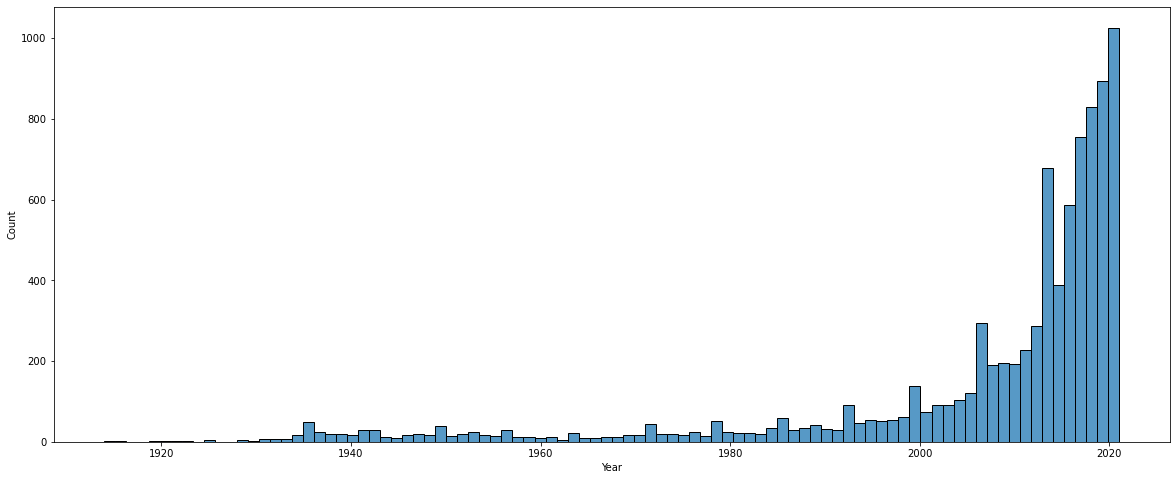

In [17]:
plt.figure(figsize=(20, 8))
sns.histplot(df['Year'])
plt.show()

## imdb rating distribution

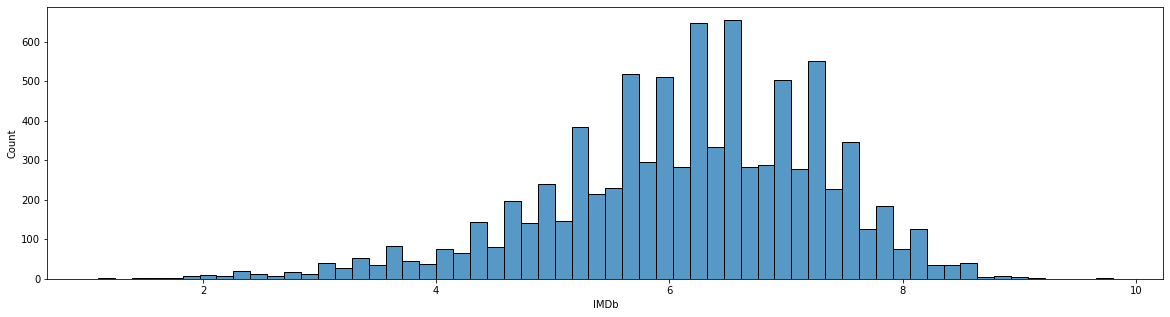

In [18]:
plt.figure(figsize=(20,5))
sns.histplot(df['IMDb'])
plt.show()

## Movie Runtime plot

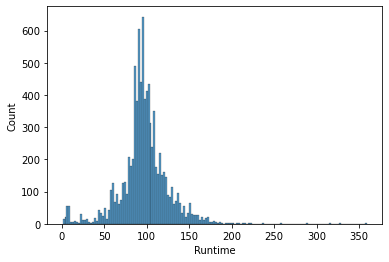

In [19]:
sns.histplot(df['Runtime'])
plt.show()

## Distribution of moview on Each Streaming Platform

In [20]:
def m_cnt(plat, count=False):
    if count==False:
        print(f'Platform: {plat} Count: {df[plat].sum()} ')
    else:
        return df[plat].sum()

In [21]:
m_cnt('Netflix')
m_cnt('Hulu')
m_cnt('Prime Video')
m_cnt('Disney+')

Platform: Netflix Count: 3325 
Platform: Hulu Count: 998 
Platform: Prime Video Count: 3799 
Platform: Disney+ Count: 819 


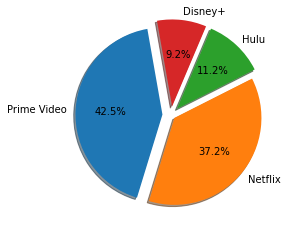

In [22]:
labels = ['Prime Video', 'Netflix', 'Hulu', 'Disney+']

s = [m_cnt('Prime Video', count=True),
     m_cnt('Netflix', count=True),
     m_cnt('Hulu', count=True),
     m_cnt('Disney+', count=True),
    ]

explode = (0.1, 0.05, 0.1, 0.1)

fig1, ax1 = plt.subplots()

ax1.pie(
    s,
    labels = labels,
    autopct = '%1.1f%%',
    explode = explode,
    shadow = True,
    startangle = 100,
)

ax1.axis = ('equal')
plt.show()

# Recommender system

In [23]:
df.head()

,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,The Irishman,2019,7.8,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,2,Dangal,2016,8.4,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,3,David Attenborough: A Life on Our Planet,2020,9.0,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,4,Lagaan: Once Upon a Time in India,2001,8.1,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,6,To All the Boys I've Loved Before,2018,7.1,1,0,0,0,0,Susan Johnson,"Comedy,Drama,Romance",United States,English,99.0


# Using only numerical value

In [41]:
df.Year = df.Year.astype("object")
df.ID = df.ID.astype("object")
ndf = df.select_dtypes(include=['float64', 'int64'])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8695 entries, 0 to 8694
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           8695 non-null   object 
 1   Title        8695 non-null   object 
 2   Year         8695 non-null   object 
 3   IMDb         8695 non-null   float64
 4   Netflix      8695 non-null   int64  
 5   Hulu         8695 non-null   int64  
 6   Prime Video  8695 non-null   int64  
 7   Disney+      8695 non-null   int64  
 8   Type         8695 non-null   int64  
 9   Directors    8695 non-null   object 
 10  Genres       8695 non-null   object 
 11  Country      8695 non-null   object 
 12  Language     8695 non-null   object 
 13  Runtime      8695 non-null   float64
dtypes: float64(2), int64(5), object(7)
memory usage: 951.1+ KB


In [43]:
ndf.head()

,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
0,7.8,1,0,0,0,0,209.0
1,8.4,1,0,0,0,0,161.0
2,9.0,1,0,0,0,0,83.0
3,8.1,1,0,0,0,0,224.0
4,7.1,1,0,0,0,0,99.0


In [44]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))

ndfmx = pd.DataFrame((scaler.fit_transform(ndf)))

In [45]:
ndfmx

,0,1,2,3,4,5,6
0,0.770115,1.0,0.0,0.0,0.0,0.0,0.581006
1,0.839080,1.0,0.0,0.0,0.0,0.0,0.446927
2,0.908046,1.0,0.0,0.0,0.0,0.0,0.229050
3,0.804598,1.0,0.0,0.0,0.0,0.0,0.622905
4,0.689655,1.0,0.0,0.0,0.0,0.0,0.273743
...,...,...,...,...,...,...,...
8690,0.666667,0.0,0.0,0.0,1.0,0.0,0.215084
8691,0.678161,0.0,0.0,0.0,1.0,0.0,0.120112
8692,0.517241,0.0,0.0,0.0,1.0,0.0,0.164804
8693,0.712644,0.0,0.0,0.0,1.0,0.0,0.128492


In [46]:
ndfmx.columns = ndf.columns

ndfmx.head()

,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
0,0.770115,1.0,0.0,0.0,0.0,0.0,0.581006
1,0.839080,1.0,0.0,0.0,0.0,0.0,0.446927
2,0.908046,1.0,0.0,0.0,0.0,0.0,0.229050
3,0.804598,1.0,0.0,0.0,0.0,0.0,0.622905
4,0.689655,1.0,0.0,0.0,0.0,0.0,0.273743


In [49]:
from sklearn.metrics.pairwise import cosine_similarity

sig = cosine_similarity(ndfmx, ndfmx)

indices = pd.Series(df.index, index=df['Title']).drop_duplicates()

In [50]:
indices.head()

Title
The Irishman                                0
Dangal                                      1
David Attenborough: A Life on Our Planet    2
Lagaan: Once Upon a Time in India           3
To All the Boys I've Loved Before           4
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8695 entries, 0 to 8694
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           8695 non-null   object 
 1   Title        8695 non-null   object 
 2   Year         8695 non-null   object 
 3   IMDb         8695 non-null   float64
 4   Netflix      8695 non-null   int64  
 5   Hulu         8695 non-null   int64  
 6   Prime Video  8695 non-null   int64  
 7   Disney+      8695 non-null   int64  
 8   Type         8695 non-null   int64  
 9   Directors    8695 non-null   object 
 10  Genres       8695 non-null   object 
 11  Country      8695 non-null   object 
 12  Language     8695 non-null   object 
 13  Runtime      8695 non-null   float64
dtypes: float64(2), int64(5), object(7)
memory usage: 951.1+ KB


In [63]:
def give_rec(title, sig=sig):

    # Get the index corresponding to original_title
    try:
        idx = indices[title]
    
    except:
        return "Sorry No recommendations"
    # Get the pairwise similarity scores
    
    
    sig_scores = list(enumerate(sig[idx]))
    
    # Sort the movies
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return df['Title'].iloc[movie_indices]

In [65]:
give_rec("The Irishman",sig = sig)

732                          Jodhaa Akbar
1236               Hum Aapke Hain Koun..!
13                                 Swades
3       Lagaan: Once Upon a Time in India
43               Kabhi Khushi Kabhie Gham
2373                  The Married Couples
1790               Saladin the Victorious
64                          Kal Ho Naa Ho
611                               Lakshya
1691                                 Manu
Name: Title, dtype: object

# Using Numerical and Textual columns

In [74]:
df.head()

,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,The Irishman,2019,7.8,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,2,Dangal,2016,8.4,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,3,David Attenborough: A Life on Our Planet,2020,9.0,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,4,Lagaan: Once Upon a Time in India,2001,8.1,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,6,To All the Boys I've Loved Before,2018,7.1,1,0,0,0,0,Susan Johnson,"Comedy,Drama,Romance",United States,English,99.0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8695 entries, 0 to 8694
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           8695 non-null   object 
 1   Title        8695 non-null   object 
 2   Year         8695 non-null   object 
 3   IMDb         8695 non-null   float64
 4   Netflix      8695 non-null   int64  
 5   Hulu         8695 non-null   int64  
 6   Prime Video  8695 non-null   int64  
 7   Disney+      8695 non-null   int64  
 8   Type         8695 non-null   int64  
 9   Directors    8695 non-null   object 
 10  Genres       8695 non-null   object 
 11  Country      8695 non-null   object 
 12  Language     8695 non-null   object 
 13  Runtime      8695 non-null   float64
dtypes: float64(2), int64(5), object(7)
memory usage: 951.1+ KB


In [82]:
def preprocess(df):
    #combining all text columns
    # Selecting all object data type and storing them in list
    s = list(df.select_dtypes(include=['object']).columns)
    # Removing ID and Title column
    s.remove("Title")
    s.remove("ID")
    # Joining all text/object columns using commas into a single column
    
    df['all_text']= df[s].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

    # Creating a tokenizer to remove unwanted elements from our data like symbols and numbers
    token = RegexpTokenizer(r'[a-zA-Z]+')

    # Converting TfidfVector from the text
    cv = TfidfVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
    text_counts= cv.fit_transform(df['all_text'])

    # Aelecting numerical variables
    ndf = df.select_dtypes(include=['float64',"int64"])

    # Scaling Numerical variables
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

    # Applying scaler on our data and converting i into a data frame
    ndfmx = pd.DataFrame((scaler.fit_transform(ndf)))
    ndfmx.columns=ndf.columns    

    # Adding our adding numerical variables in the TF-IDF vector
    IMDb = ndfmx.IMDb.values[:, None]
    X_train_dtm = hstack((text_counts, IMDb))
    Netflix = ndfmx.Netflix.values[:, None]
    X_train_dtm = hstack((X_train_dtm, Netflix))
    Hulu = ndfmx.Hulu.values[:, None]
    X_train_dtm = hstack((X_train_dtm, Hulu))
    Prime = ndfmx["Prime Video"].values[:, None]
    X_train_dtm = hstack((X_train_dtm, Prime))
    Disney = ndfmx["Disney+"].values[:, None]
    X_train_dtm = hstack((X_train_dtm, Disney))
    Runtime = ndfmx.Runtime.values[:, None]
    X_train_dtm = hstack((X_train_dtm, Runtime))
    return X_train_dtm

In [83]:
mat = preprocess(df)
mat.shape

(8695, 8190)

In [89]:
print(mat)

  (0, 2587)	0.2964384198293994
  (0, 6995)	0.24357731757993112
  (0, 4126)	0.408655605752447
  (0, 3342)	0.31515993293895683
  (0, 2110)	0.08246710547780248
  (0, 7053)	0.09683065961157948
  (0, 7605)	0.09106100035635795
  (0, 1930)	0.11899406393396786
  (0, 1562)	0.2077217740689005
  (0, 833)	0.26302834252288787
  (0, 6625)	0.5139890989850002
  (0, 4684)	0.4139123515122777
  (1, 3095)	0.1865589701473554
  (1, 5187)	0.43080769261675306
  (1, 3772)	0.40304654684726554
  (1, 490)	0.24224501094304585
  (1, 3841)	0.1620183214070904
  (1, 3296)	0.16461498404759173
  (1, 7014)	0.21695968210169508
  (1, 42)	0.13609796229016433
  (1, 7429)	0.41069357823095465
  (1, 5352)	0.4450788838890118
  (1, 2110)	0.06106942062837135
  (1, 7053)	0.07170607295212869
  (1, 7605)	0.13486692667052688
  :	:
  (8669, 8189)	0.0893854748603352
  (8670, 8189)	0.2122905027932961
  (8671, 8189)	0.22905027932960895
  (8672, 8189)	0.2541899441340782
  (8673, 8189)	0.2122905027932961
  (8674, 8189)	0.16480446927374304
 

In [86]:
sig2 = cosine_similarity(mat, mat)

In [92]:
give_rec("Bright", sig=sig2)

653                               Sabotage
326                          A Ghost Story
533             The Twilight Saga: Eclipse
286             Black Mirror: Bandersnatch
828                             Fred Claus
1434                                   Joy
1862                               Perdida
2133                                   ATM
758                      WHAT DID JACK DO?
891     Jingle Jangle: A Christmas Journey
Name: Title, dtype: object

In [88]:
# df['all_text']= df[s].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
df['all_text']

0       2019,Martin Scorsese,Biography,Crime,Drama,Uni...
1       2016,Nitesh Tiwari,Action,Biography,Drama,Spor...
2       2020,Alastair Fothergill,Jonathan Hughes,Keith...
3       2001,Ashutosh Gowariker,Drama,Musical,Sport,In...
4       2018,Susan Johnson,Comedy,Drama,Romance,United...
                              ...                        
8690    2020,Alastair Fothergill,Jeff Wilson,Documenta...
8691    2017,Richard Slater-Jones,Documentary,United S...
8692    1980,Edward M. Abroms,Adventure,Drama,Family,U...
8693    2021,Aiji Okazaki,Kentaro Takayanagi,Documenta...
8694    2020,Trevor Moore,Comedy,Family,Musical,United...
Name: all_text, Length: 8695, dtype: object

,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,all_text
0,1,The Irishman,2019,7.8,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0,"2019,Martin Scorsese,Biography,Crime,Drama,Uni..."
1,2,Dangal,2016,8.4,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0,"2016,Nitesh Tiwari,Action,Biography,Drama,Spor..."
2,3,David Attenborough: A Life on Our Planet,2020,9.0,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0,"2020,Alastair Fothergill,Jonathan Hughes,Keith..."
3,4,Lagaan: Once Upon a Time in India,2001,8.1,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0,"2001,Ashutosh Gowariker,Drama,Musical,Sport,In..."
4,6,To All the Boys I've Loved Before,2018,7.1,1,0,0,0,0,Susan Johnson,"Comedy,Drama,Romance",United States,English,99.0,"2018,Susan Johnson,Comedy,Drama,Romance,United..."
